In [2]:
import pandas as pd

df = pd.read_csv('~/PycharmProjects/FinancialProgramClass/Homework/HW2/TAQ_JNJ_1004_1015_2010_trading_.csv', delim_whitespace=True)

df.dtypes

date        int64
hour        int64
minute      int64
second      int64
price     float64
volume      int64
dtype: object

In [3]:
df1 = df.loc[(df.hour >= 10) & (df.hour < 16)]
df2 = df.loc[(df.hour == 9) & (df.minute >= 30)]

data = pd.concat([df1, df2], axis=0)

data.reset_index(drop=True, inplace=True)

data.to_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv')

In [78]:
from matplotlib import pyplot as plt
%matplotlib inline

data.loc[:,'date'] = pd.to_datetime(data.date)

data.dtypes

date           datetime64[ns]
hour                    int64
minute                  int64
second                  int64
price                 float64
volume                  int64
shift_price           float64
price_1               float64
dtype: object

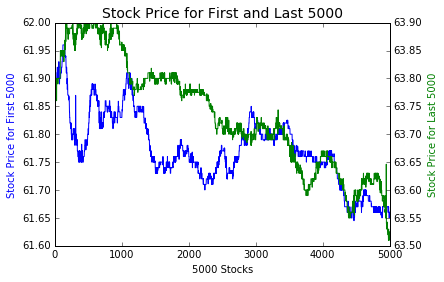

In [79]:
fig, ax1 = py.subplots()

ax2 = ax1.twinx()

ax1.plot(range(5000), data.iloc[:5000, 4], 'b-')
ax2.plot(range(5000), data.iloc[-5000:, 4], 'g-')

plt.title('Stock Price for First and Last 5000', fontsize=14)

ax1.set_xlabel('5000 Stocks')
ax1.set_ylabel('Stock Price for First 5000', color='b')
ax2.set_ylabel('Stock Price for Last 5000', color='g')

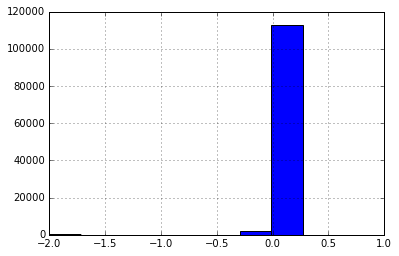

In [98]:
data.loc[:,'price_1'] = data.price.shift(1)

data_y = data.loc[data.price != data.shift_price].dropna()
data_y.loc[:, 'price_change'] = data.loc[:,'price'] - data.loc[:,'price_1']


data_y.loc[:, 'price_change'].hist()

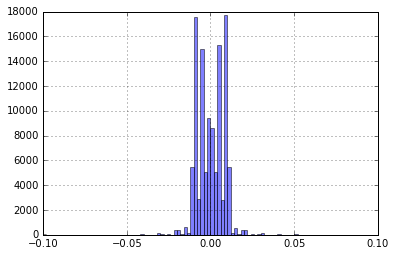

In [106]:
data_y.loc[(data_y.price_change > -0.1) & (data_y.price_change < 0.1), 'price_change'].hist(color='b', alpha=0.5, bins=100)

In [91]:
freq = pd.DataFrame(data_y.price_change.value_counts())

freq.describe()

,price_change
count,974.000000
mean,117.845996
std,791.135007
min,1.000000
25%,1.000000
50%,3.000000
75%,35.750000
max,13204.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13469be80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1348ce828>]], dtype=object)

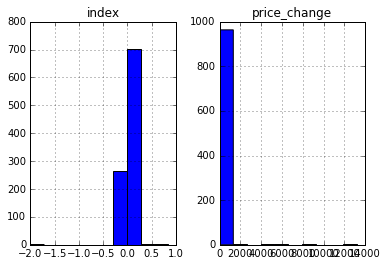